<a href="https://colab.research.google.com/github/FelipeMoraR/Django_Jeans/blob/main/AnalisisDeDatosClima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime
from google.colab import files
import io
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Carga Dataset

In [ ]:
archivos = files.upload()

Saving weatherAUS.csv to weatherAUS (1).csv


In [ ]:
input_dataset = pd.read_csv(io.BytesIO(archivos["weatherAUS (1).csv"]))
input_dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No




# 1.   Análisis Exploratorio




In [ ]:
df_datos_clima = pd.DataFrame(input_dataset)
df_datos_clima

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [ ]:
df_datos_clima.shape

(142193, 24)

In [ ]:
pd.DataFrame(df_datos_clima.dtypes)

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [ ]:
df_datos_clima.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000





# 2.   Limpieza de los datos



In [ ]:
tempVekoLlu_dataset = df_datos_clima.loc[:, ['Location','Temp3pm','WindSpeed3pm','RainTomorrow']]
tempVekoLlu_dataset

,Location,Temp3pm,WindSpeed3pm,RainTomorrow
0,Albury,21.8,24.0,No
1,Albury,24.3,22.0,No
2,Albury,23.2,26.0,No
3,Albury,26.5,9.0,No
4,Albury,29.7,20.0,No
...,...,...,...,...
142188,Uluru,20.9,13.0,No
142189,Uluru,22.4,11.0,No
142190,Uluru,24.5,9.0,No
142191,Uluru,26.1,9.0,No


In [ ]:
for i in tempVekoLlu_dataset:
  nulos = tempVekoLlu_dataset[i].isna().sum()
  print('columna', i, 'tiene', nulos, 'nulos')

columna Location tiene 0 nulos
columna Temp3pm tiene 2726 nulos
columna WindSpeed3pm tiene 2630 nulos
columna RainTomorrow tiene 0 nulos


In [ ]:
NoNulls_dataset = pd.DataFrame(tempVekoLlu_dataset.dropna())
NoNulls_dataset

,Location,Temp3pm,WindSpeed3pm,RainTomorrow
0,Albury,21.8,24.0,No
1,Albury,24.3,22.0,No
2,Albury,23.2,26.0,No
3,Albury,26.5,9.0,No
4,Albury,29.7,20.0,No
...,...,...,...,...
142188,Uluru,20.9,13.0,No
142189,Uluru,22.4,11.0,No
142190,Uluru,24.5,9.0,No
142191,Uluru,26.1,9.0,No


In [ ]:
for i in NoNulls_dataset:
  nulos = NoNulls_dataset[i].isna().sum()
  print('columna', i, 'tiene', nulos, 'nulos')

columna Location tiene 0 nulos
columna Temp3pm tiene 0 nulos
columna WindSpeed3pm tiene 0 nulos
columna RainTomorrow tiene 0 nulos


In [ ]:
seleccionados = NoNulls_dataset.loc[NoNulls_dataset['Location'] == 'Albury', ['Temp3pm','WindSpeed3pm','RainTomorrow']].values
clima_selec_df = pd.DataFrame(seleccionados)

clima_selec_df[2] = clima_selec_df[2].map({'No': 0, 'Yes': 1})

values_clima = clima_selec_df.values

In [ ]:
columnas = ['Temp3pm','WindSpeed3pm','RainTomorrow']
clima_selec_df.columns = columnas
clima_selec_df

,Temp3pm,WindSpeed3pm,RainTomorrow
0,21.8,24.0,0
1,24.3,22.0,0
2,23.2,26.0,0
3,26.5,9.0,0
4,29.7,20.0,0
...,...,...,...
2999,14.3,2.0,0
3000,13.3,0.0,0
3001,10.2,2.0,0
3002,13.1,15.0,0





# 3.   Clusters



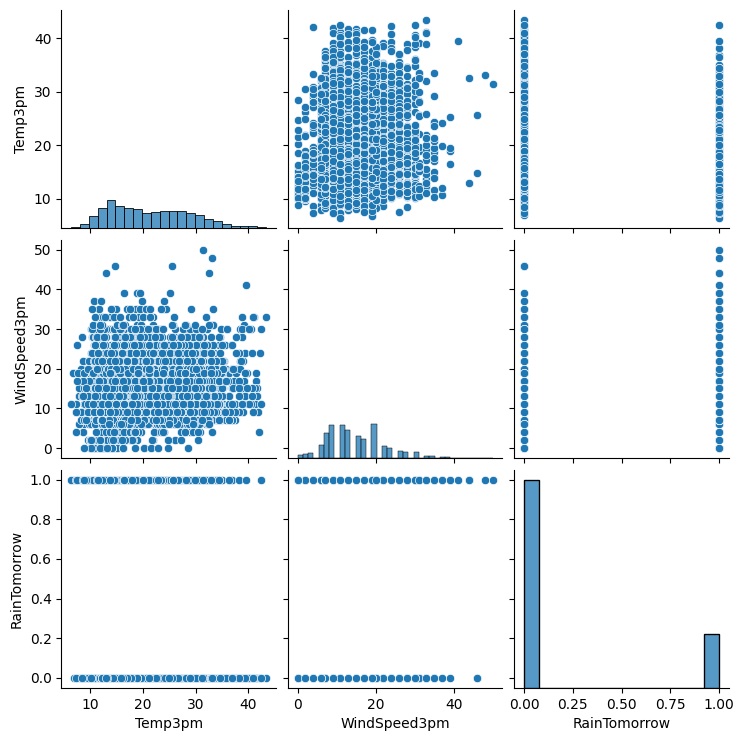

In [ ]:
sb.pairplot(clima_selec_df)
plt.show()

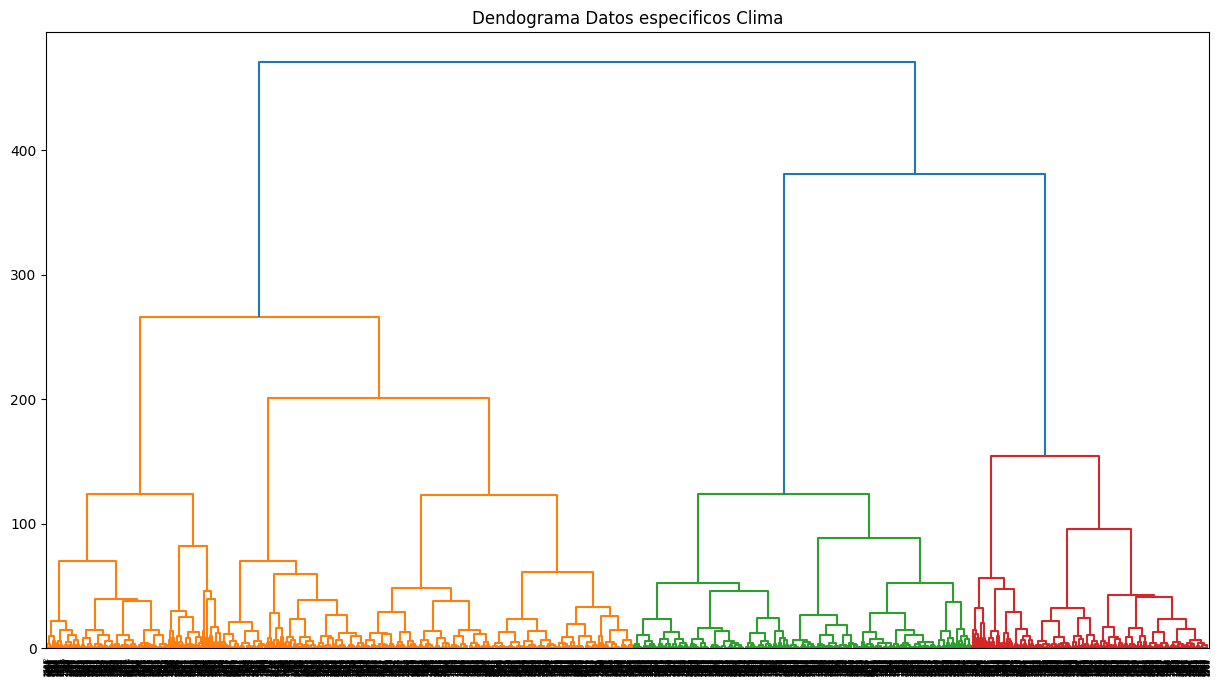

In [ ]:
# veamos el dendograma...
clima_linkeados = linkage(values_clima, method='ward')
plt.figure(figsize=(15, 8))
dend = dendrogram(clima_linkeados)
plt.title('Dendograma Datos especificos Clima')
plt.show()

In [ ]:
clusterer = AgglomerativeClustering(n_clusters=3 , metric='euclidean', linkage='ward')
clusterer.fit_predict(values_clima)

array([1, 0, 0, ..., 2, 2, 2])

In [ ]:
clusterer.fit(values_clima)

# Obtener las etiquetas de clúster asignadas a cada muestra
labels = clusterer.labels_

# Contar el tamaño de cada clúster
unique_labels, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique_labels, counts))

# Imprimir el tamaño de cada clúster
for cluster_label, size in cluster_sizes.items():
    print(f"Tamaño del clúster {cluster_label}: {size}")

Tamaño del clúster 0: 1519
Tamaño del clúster 1: 611
Tamaño del clúster 2: 874


<Figure size 640x480 with 0 Axes>

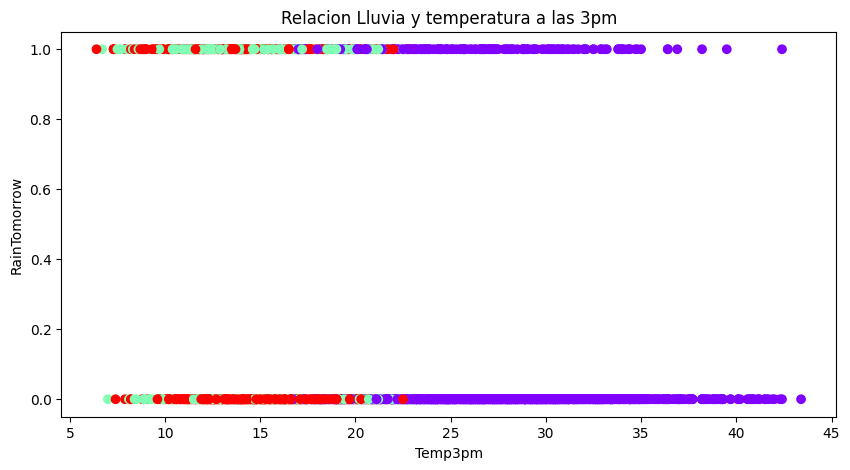

In [ ]:
plt.figure()
plt.figure(figsize=(10, 5))
plt.title("Relacion Lluvia y temperatura a las 3pm")
plt.scatter(values_clima[ : , 0], values_clima[ : , 2] , c = clusterer.labels_ , cmap='rainbow')
plt.xlabel('Temp3pm')
plt.ylabel('RainTomorrow')
plt.show()

<Figure size 640x480 with 0 Axes>

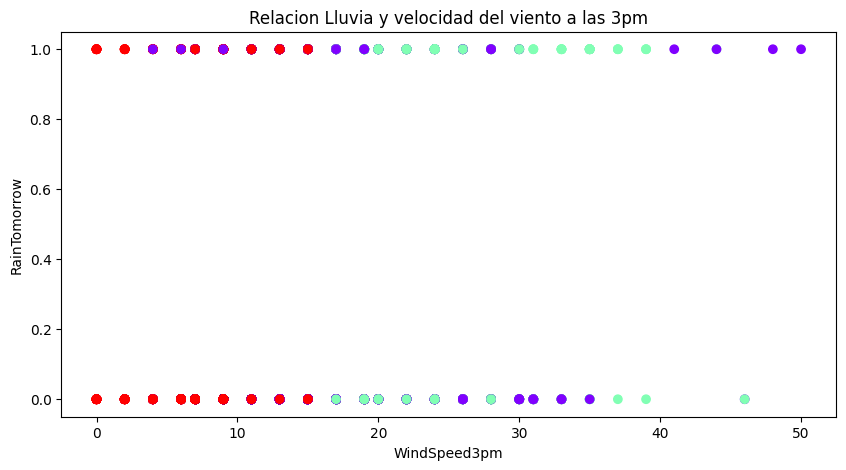

In [ ]:
plt.figure()

plt.figure(figsize=(10, 5))
plt.title("Relacion Lluvia y velocidad del viento a las 3pm")
plt.scatter(values_clima[ : , 1], values_clima[ : , 2] , c = clusterer.labels_ , cmap='rainbow')
plt.xlabel('WindSpeed3pm')
plt.ylabel('RainTomorrow')
plt.show()

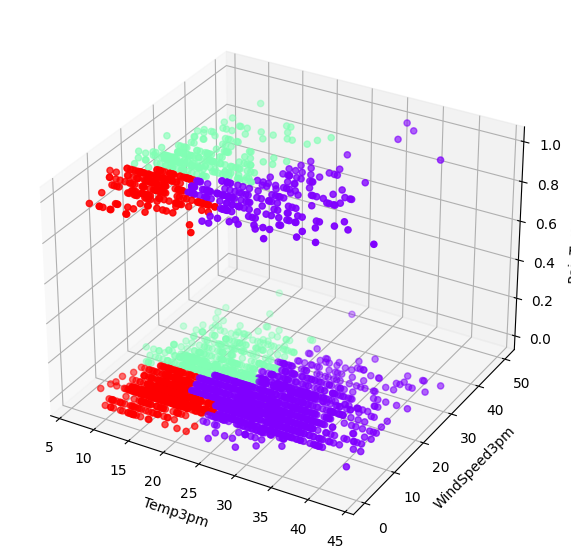

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = values_clima[:, 0]  # Variable en el eje x
y = values_clima[:, 1]  # Variable en el eje y
z = values_clima[:, 2]  # Variable en el eje z



# Scatter plot 3D
ax.scatter(x, y, z, c=clusterer.labels_, cmap='rainbow')

ax.set_xlabel('Temp3pm')
ax.set_ylabel('WindSpeed3pm')
ax.set_zlabel('RainTomorrow')



plt.show()




# 4.  Modelo de predicción




In [ ]:
df_datos_clima_c = pd.DataFrame(input_dataset)
eliminar = ['Evaporation','Sunshine','WindGustDir','WindDir9am','WindDir3pm','Date']
df_datos = df_datos_clima_c.drop(columns=eliminar)
columnas = df_datos.columns
df_predecir = pd.DataFrame(df_datos.values)
df_predecir.columns = columnas
NoNulls_predecir = pd.DataFrame(df_predecir.dropna())
NoNulls_predecir['RainToday'] = NoNulls_predecir['RainToday'].map({'No': 0, 'Yes': 1})
NoNulls_predecir['RainTomorrow'] = NoNulls_predecir['RainTomorrow'].map({'No': 0, 'Yes': 1})
NoNulls_predecir = NoNulls_predecir.drop(columns = 'Location')

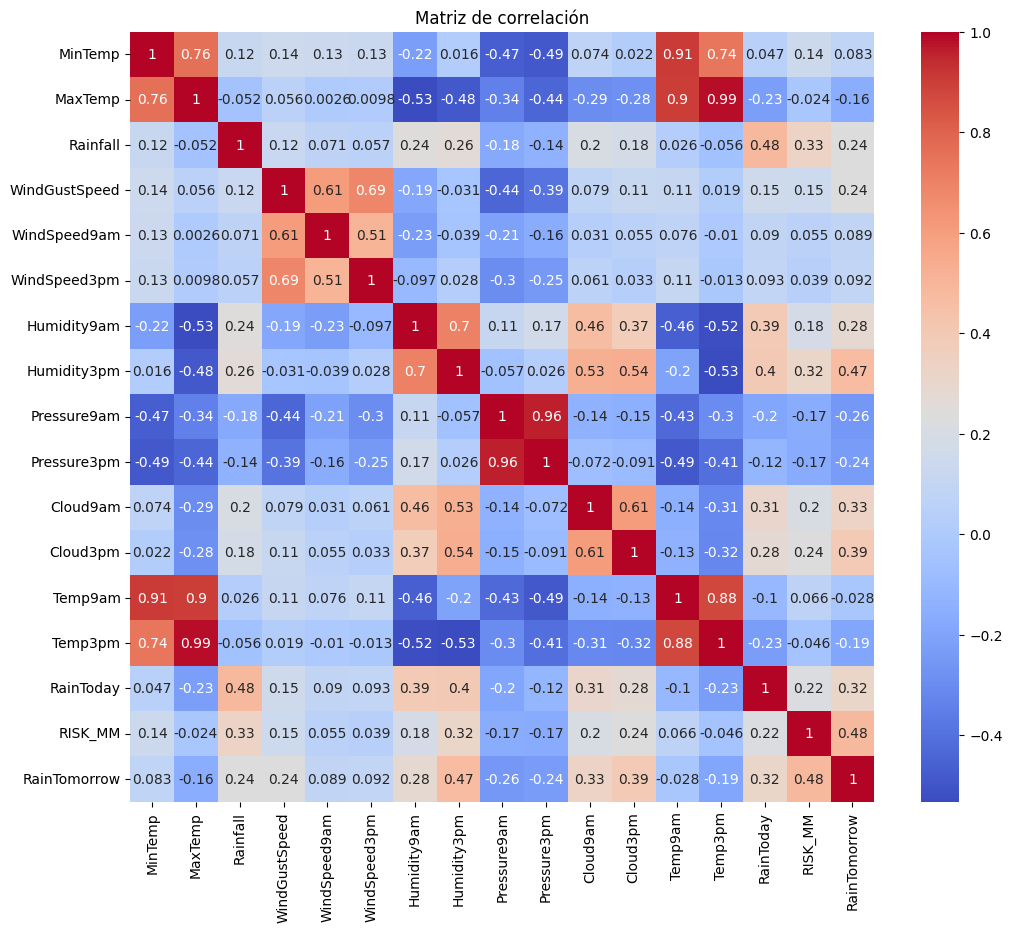

In [ ]:
NoNulls_predecir = NoNulls_predecir.astype(float)
correlation_matrix = NoNulls_predecir.corr()
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

<Figure size 400x400 with 0 Axes>

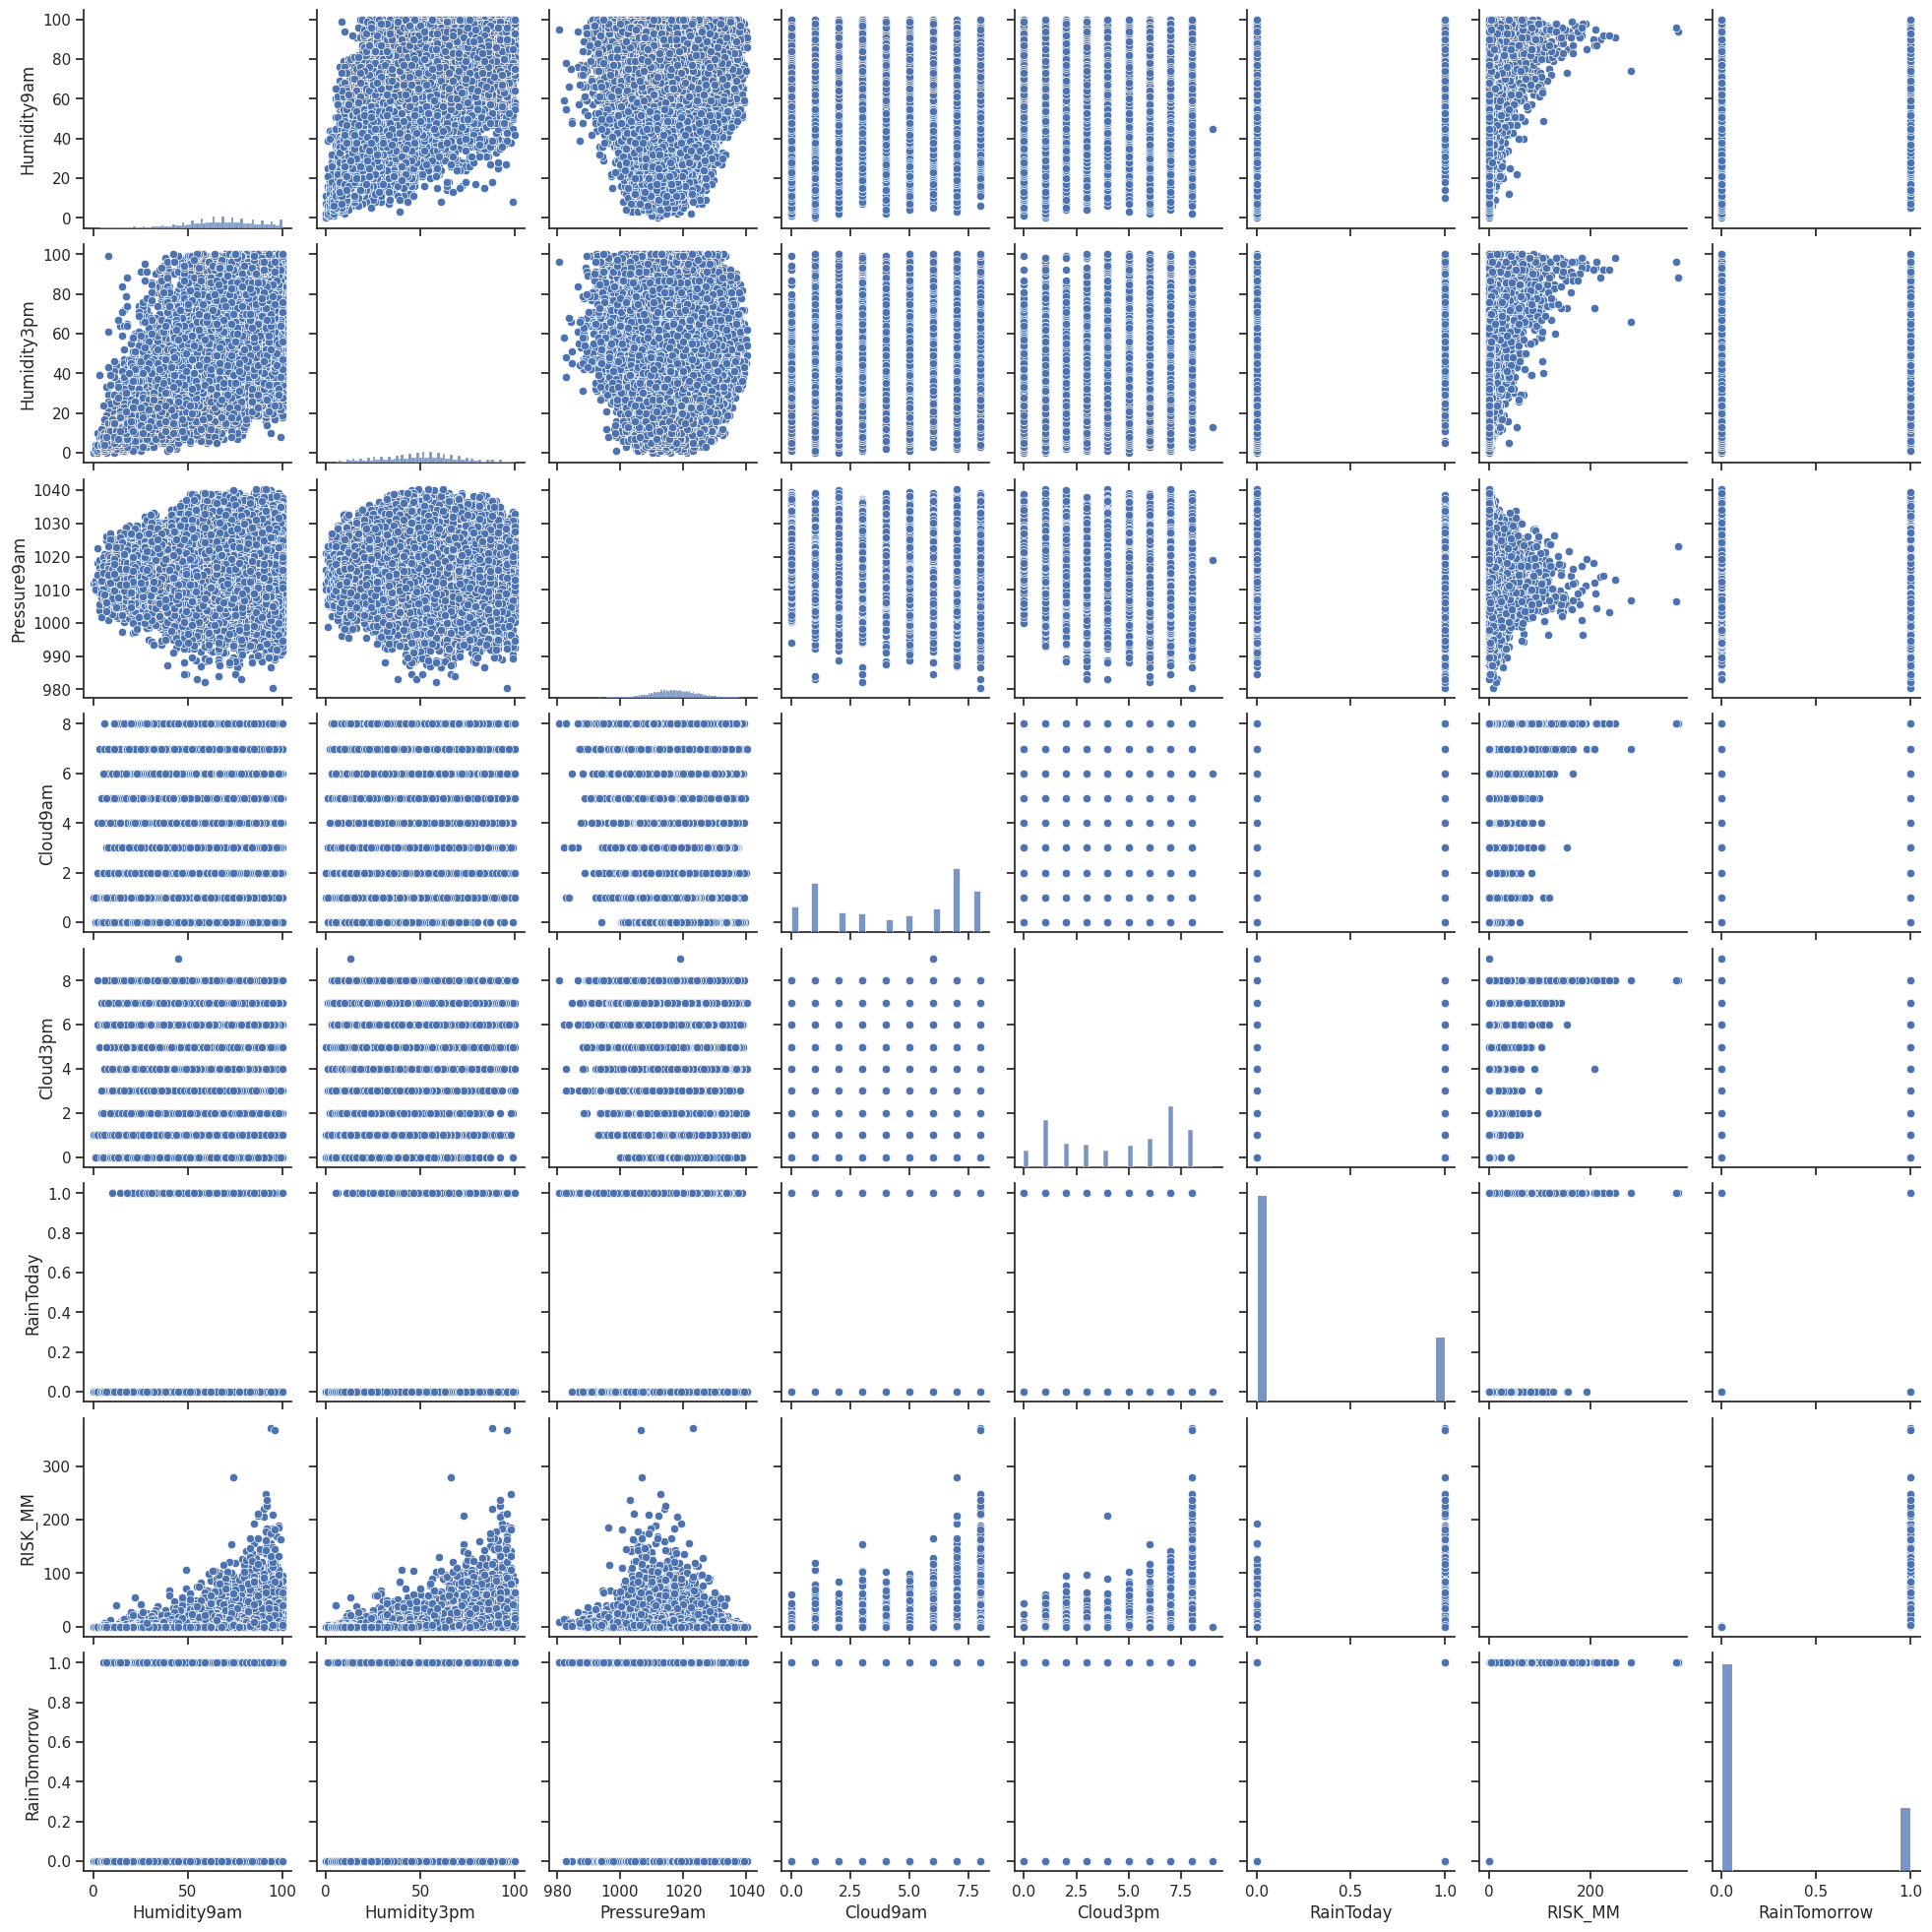

In [ ]:
sb.set(style="ticks")
plt.figure(figsize=(4, 4))
sb.pairplot(NoNulls_predecir[['Humidity9am', 'Humidity3pm', 'Pressure9am','Cloud9am', 'Cloud3pm','RainToday', 'RISK_MM','RainTomorrow']])
plt.show()

In [ ]:
NoNulls_predecir.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
y_data = NoNulls_predecir['RainTomorrow']
X_data = NoNulls_predecir[['Humidity9am', 'Humidity3pm', 'Pressure9am','Cloud9am', 'Cloud3pm','RainToday', 'RISK_MM']]

**LinearRegression**

In [ ]:
X_entrenar1, X_test1 , y_entrenar1 , y_test1 = train_test_split(
    X_data, y_data, test_size = 0.2 , random_state=42)


modelo1 = LinearRegression()
modelo1.fit(X_entrenar1, y_entrenar1)


y_pred1 = modelo1.predict(X_test1)


In [ ]:
print('Coeficientes: \n b1=', modelo1.coef_, '\n a=', modelo1.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_test1, y_pred1))
print('Coeficiente de determinación: %.2f'% r2_score(y_test1, y_pred1))
print('Score del modelo: %.2f' % modelo1.score(X_entrenar1,y_entrenar1))

Coeficientes: 
 b1= [-0.0011328   0.00588644 -0.00875605  0.00200839  0.01932928  0.08047038
  0.01445206] 
 a= 8.767379660478285
Mean squared error (MSE): 0.11
Coeficiente de determinación: 0.39
Score del modelo: 0.39


**LogisticRegression**

In [ ]:
X_entrenar, X_test , y_entrenar , y_test = train_test_split(
    X_data, y_data, test_size = 0.2 , random_state=42)


scaler = StandardScaler()
X_entrenar_scaled = scaler.fit_transform(X_entrenar)
X_test_scaled = scaler.transform(X_test)


modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_entrenar_scaled, y_entrenar)


y_pred = modelo.predict(X_test_scaled)

In [ ]:
print('Coeficientes: \n b1=', modelo.coef_, '\n a=', modelo.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(y_test, y_pred))
print('Coeficiente de determinación: %.2f'% r2_score(y_test, y_pred))
print('Score del modelo: %.2f' % modelo.score(X_entrenar,y_entrenar))

Coeficientes: 
 b1= [[-3.36010226e-02  2.28749838e-01 -1.45684433e-01  3.06648118e-02
   1.48379487e-01  1.12049326e-02  4.39151295e+01]] 
 a= [6.25739474]
Mean squared error (MSE): 0.01
Coeficiente de determinación: 0.97
Score del modelo: 0.93


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
NoNulls_predecir

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0.0
11,15.9,21.7,2.2,31.0,15.0,13.0,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,1.0,15.6,1.0
12,15.9,18.6,15.6,61.0,28.0,28.0,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,1.0,3.6,1.0
15,14.1,20.9,0.0,22.0,11.0,9.0,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,0.0,16.8,1.0
16,13.5,22.9,16.8,63.0,6.0,20.0,80.0,65.0,1005.8,1002.2,8.0,1.0,18.0,21.5,1.0,10.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142162,14.6,26.3,0.0,37.0,19.0,20.0,61.0,36.0,1022.0,1018.6,7.0,1.0,15.4,25.0,0.0,0.4,0.0
142163,14.3,27.6,0.4,39.0,0.0,20.0,68.0,27.0,1020.5,1016.1,4.0,7.0,16.1,27.2,0.0,0.0,0.0
142166,12.7,22.2,0.0,37.0,19.0,13.0,59.0,34.0,1024.3,1021.7,8.0,8.0,13.9,21.0,0.0,0.0,0.0
142167,9.4,22.7,0.0,35.0,13.0,17.0,62.0,32.0,1026.6,1023.6,8.0,4.0,11.8,22.3,0.0,0.0,0.0


In [ ]:
#'Humidity9am', 'Humidity3pm', 'Pressure9am','Cloud9am', 'Cloud3pm','RainToday', 'RISK_MM'
predicción = modelo.predict([(82.0,33.0,1010.8,7.0,8.0,0.0,0.2)])#0
predicción1 = modelo.predict([(69.0,82.0,1012.2,8.0,1.0,0.0,16.8)])#1
predicción2 = modelo.predict([(80.0,65.0,1005.8,8.0,1.0,1.0,10.6)])#1
predicción3 = modelo.predict([(62.0,32.0,1026.6,8.0,4.0,0.0,0.0)])#0

print(predicción)
print(predicción1)
print(predicción2)
print(predicción3)

[0.]
[1.]
[1.]
[0.]
